<a href="https://colab.research.google.com/github/Bhaskar-459/ml_labs/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAE: 1.154802750756266
MSE 2.1303839221203207
RMSE 1.4595834755574348
MAE 0.09259806143118962
RMSE 0.20898332281616697
MSE 0.04367402921528626


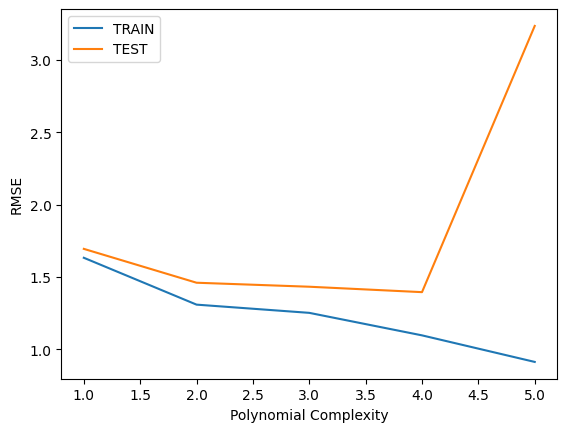

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('advertising.csv')
df.head()
df.describe()

from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
poly_features = polynomial_converter.fit_transform(x)
poly_features.shape

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

test_predictions = model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print("MAE:", MAE)
print("MSE", MSE)
print("RMSE", RMSE)

train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
  polynomial_converter = PolynomialFeatures(degree = d, include_bias = False)
  poly_features = polynomial_converter.fit_transform(x)
  x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)
  model = LinearRegression(fit_intercept = True)
  model.fit(x_train, y_train)

  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

  test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

  train_rmse_errors.append(train_RMSE)
  test_rmse_errors.append(test_RMSE)

print("MAE", mean_absolute_error(y_train, train_pred))
print("RMSE", train_RMSE)
print("MSE", mean_squared_error(y_train, train_pred))


plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN')
plt.plot(range(1,6), test_rmse_errors[:5], label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()